# Exercise 8: Clustering stocks using KMeans

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day).  You are given a NumPy array `movements` of daily price movements from 2010 to 2015, where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others.  To account for this, include a `Normalizer` at the beginning of your pipeline.  The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

## Normalizer vs StandardScaler
Note that `Normalizer()` is different to `StandardScaler()`, which you used in the previous exercise. While `StandardScaler()` standardizes **features** (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, `Normalizer()` rescales **each sample** - here, each company's stock price - independently of the other.

This dataset was obtained from the Yahoo! Finance API.

From the course _Transition to Data Science_. [Buy the entire course for just $10](https://www.udemy.com/transition-to-data-science-in-python/?couponCode=CLUSTER-NBS) for many more exercises and helpful video lectures.

**Step 1:** Load the data _(written for you)_

In [1]:
import pandas as pd

fn = './data/company-stock-movements-2010-2015-incl.csv'
stocks_df = pd.read_csv(fn, index_col=0)

**Step 2:** Inspect the first few rows of the DataFrame `stocks_df` by calling its `head()` function.

In [2]:
stocks_df.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


**Step 3:** Extract the NumPy array `movements` from the DataFrame and the list of company names (_written for you_)

In [3]:
companies = list(stocks_df.index)
movements = stocks_df.values

**Step 4:** Make the necessary imports:

- `Normalizer` from `sklearn.preprocessing`.
- `KMeans` from `sklearn.cluster`.
- `make_pipeline` from `sklearn.pipeline`.

In [4]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

**Step 3:** Create an instance of `Normalizer` called `normalizer`.

In [5]:
normalizer = Normalizer()

**Step 4:** Create an instance of `KMeans` called `kmeans` with `14` clusters.

In [6]:
kmeans = KMeans(n_clusters=14, random_state=0)

**Step 5:** Using `make_pipeline()`, create a pipeline called `pipeline` that chains `normalizer` and `kmeans`.

In [7]:
pipeline = make_pipeline(normalizer, kmeans)

**Step 6:** Fit the pipeline to the `movements` array.

In [8]:
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=14, random_state=0))])

In [9]:
y_kmeans = pipeline.predict(movements)

**In the next exercise:** Let's check out your clustering!

**Additional exercise**

**1.** Display company names in the same clusters


In [16]:
prediction_cluster = pd.DataFrame(zip(companies, y_kmeans), columns = ['Companies', 'Clusters'])
#prediction_cluster = prediction_cluster.sort_values(['Clusters'])
prediction_cluster

,Companies,Clusters
0,Apple,9
1,AIG,0
2,Amazon,5
3,American express,0
4,Boeing,6
5,Bank of America,8
6,British American Tobacco,2
7,Canon,3
8,Caterpillar,4
9,Colgate-Palmolive,12


2. Display company price movements of stocks stated in Q1. What similarities do you observe?


In [19]:
prediction_cluster['Movements'] = movements.tolist()
prediction_cluster = prediction_cluster.sort_values(['Clusters'])
prediction_cluster

,Companies,Clusters,Movements
1,AIG,0,"[-0.6400020000000026, -0.6500000000000021, -0...."
3,American express,0,"[0.1099969999999999, 0.0, 0.2600020000000071, ..."
55,Wells Fargo,0,"[0.3000000000000007, 0.8000000000000007, 0.079..."
30,MasterCard,0,"[-1.1499980000000392, -1.7600060000000326, -0...."
20,Home Depot,0,"[-0.4799999999999969, 0.1499989999999975, -0.0..."
39,Pfizer,1,"[0.6600000000000001, -0.2600000000000015, -0.0..."
25,Johnson & Johnson,1,"[-0.0299989999999894, -0.6500020000000077, 0.5..."
42,Royal Dutch Shell,2,"[0.4899969999999953, -0.1900030000000043, -0.2..."
43,SAP,2,"[-0.1199989999999928, -0.1599999999999966, 0.5..."
46,Sanofi-Aventis,2,"[0.4799999999999969, -0.1100009999999969, 0.15..."


3. Visualize the data and its clusters in a plot. (Hint: Dimension reduction)

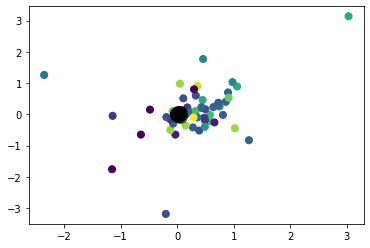

In [22]:
import matplotlib.pyplot as plt

plt.scatter(movements[:, 0], movements[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

4. How many clusters should you set? (Hint: Use scree plot)


In [28]:
wcss = []

for i in range(1,16):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(movements)
    wcss.append(kmeans.inertia_)

C:\Users\tangkaiv\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


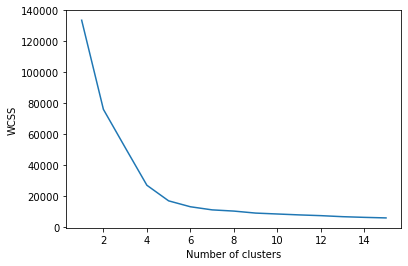

In [29]:
import matplotlib.pyplot as plt
plt.plot(range(1, 16), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()